In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("/home/jerome/Documents/CSV FILE/spam_email.csv")

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.duplicated().sum()

np.int64(415)

In [6]:
df.drop_duplicates(inplace= True)

<Axes: xlabel='Category', ylabel='count'>

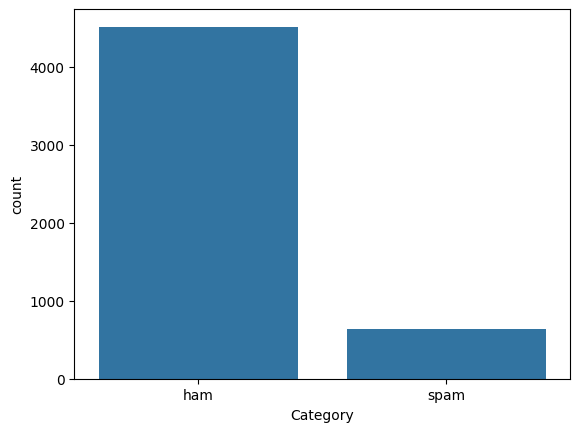

In [7]:
sns.barplot(df["Category"].value_counts())

<Axes: ylabel='count'>

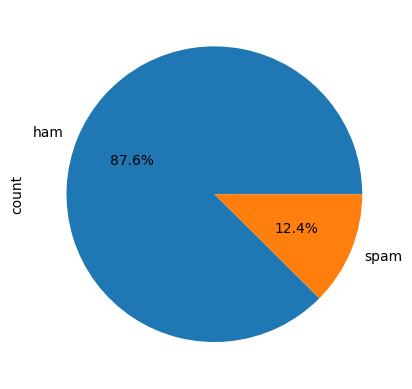

In [8]:
df["Category"].value_counts().plot.pie(autopct = '%1.1f%%')

In [9]:
df["Category"] = df["Category"].map({"ham": 0, "spam": 1})

In [10]:
def claen_str(string):
    reg = RegexpTokenizer(r'[a-z]+')
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

In [11]:
df["text_clean"] =df['Message'].apply(
    lambda string: claen_str(string))

In [13]:
cv = CountVectorizer()
X = cv.fit_transform(df.text_clean)
y = df.Category


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state = 42 )

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       896
           1       0.83      0.88      0.85       136

    accuracy                           0.96      1032
   macro avg       0.91      0.92      0.92      1032
weighted avg       0.96      0.96      0.96      1032

